Data on student performance in Portuguese language course (taken from kaggle):

Attributes for student-por.csv (Portuguese language course) datasets:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)¶

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)¶

health - current health status (numeric: from 1 - very bad to 5 - very good)¶

absences - number of school absences (numeric: from 0 to 93) these grades are related with the course subject, Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

## Machine learing basics

Machine learning (ML) is a subset of artificial intelligence (AI) that enables computers to learn from historical data, identify patterns, and make logical decisions with little to no human intervention.1 ML algorithms use computational methods to "learn" information directly from data without relying on a predetermined equation as a model. The algorithms adaptively improve their performance as the number of samples available for learning increases.

https://www.youtube.com/watch?v=PeMlggyqz0Y

__There are primarily three types of machine learning:__
1. Supervised
2. Unsupervised
3. Reinforcement learning

### How to go about designing ML model

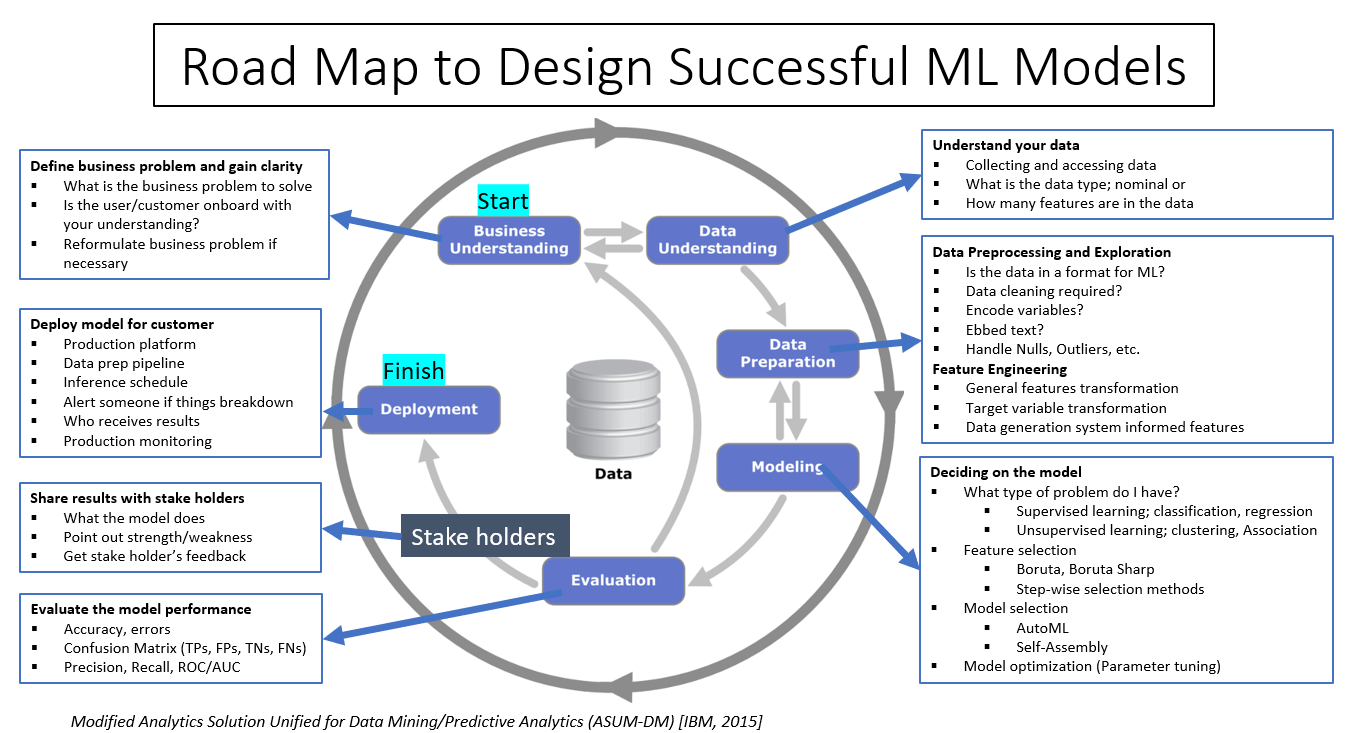

## Problem statement

1. A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. 
2. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. 
3. The data is used to build classification models to predict students' dropout and academic sucess. 
4. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.

__Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course.__

## Data source
1. https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [47]:
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# let's pull metat data for understanding
import requests
from bs4 import BeautifulSoup

# the data is a zipped file so we need URL and zipfile to access it
import urllib.request
import zipfile

## Get the meta data for understanding

In [54]:
# URL of the webpage
url = 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success'

# Send a GET request to the webpage
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table that contains the features
table = soup.find('table', {'class': 'my-4 table w-full'})
#table = soup.find('dive', {'class': 'overflow-x-auto'})


# Extract the table headers
headers = [th.get_text().strip() for th in table.find_all('th')]

# Extract the table rows
rows = []
for tr in table.find_all('tr'):
    row = [td.get_text().strip() for td in tr.find_all('td')]
    if row:
        rows.append(row)

# Create a DataFrame with the extracted data
meat_df = pd.DataFrame(rows, columns=headers)

# Display the DataFrame
meat_df.shape

(10, 6)

In [28]:
# Display the DataFrame
meat_df

Attribute Name     Role        Type  \
0                  Marital status  Feature    Discrete   
1                Application mode  Feature    Discrete   
2               Application order  Feature    Discrete   
3                          Course  Feature    Discrete   
4      Daytime/evening attendance  Feature    Discrete   
5          Previous qualification  Feature    Discrete   
6  Previous qualification (grade)  Feature  Continuous   
7                     Nacionality  Feature    Discrete   
8          Mother's qualification  Feature    Discrete   
9          Father's qualification  Feature    Discrete   

                                         Description Units Missing Values  
0  1 – single 2 – married 3 – widower 4 – divorce...     1          false  
1  1 - 1st phase - general contingent 2 - Ordinan...                false  
2  Application order (between 0 - first choice; a...                false  
3  33 - Biofuel Production Technologies 171 - Ani...                false  
4                            1 – daytime 0 - evening                false  
5  1 - Secondary education 2 - Higher education -...                false  
6  Grade of previous qualification (between 0 and...                false  
7  1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...                false  
8  1 - Secondary Education - 12th Year of Schooli...                false  
9  1 - Secondary Education - 12th Year of Schooli...                false

## Access the actual data

In [30]:
url = 'https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip'


# Download the zip file
zipfile_name = "predict+students+dropout+and+academic+success.zip"#'student.zip'
data_file_name = "data.csv"#'student-mat.csv'
urllib.request.urlretrieve(url, zipfile_name)

# Extract the "student-mat.csv" file from the zip file
with zipfile.ZipFile(zipfile_name, 'r') as z:
    z.extractall()
    extracted_files = z.namelist()

# Find the extracted file path
file_path = [file for file in extracted_files if data_file_name in file][0]

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataset
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [31]:
df.shape

(4424, 37)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

1. __The data has 4424 records and 36 features and one target variable. There are no missing values in the dataset__
2. __The 29 features are integer data type, 7 features that have float as the data type, and the target feature is categorical__

## visualize the variables

In [43]:
def visualize_categorical_feature(data, column_name):
    # Get the count of unique values in the column
    value_counts = data[column_name].value_counts(normalize=True)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Normalized value')
    plt.title(f'Distribution of {column_name}')
    plt.show()

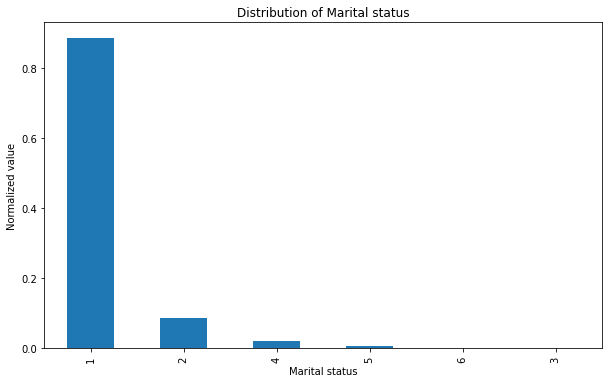

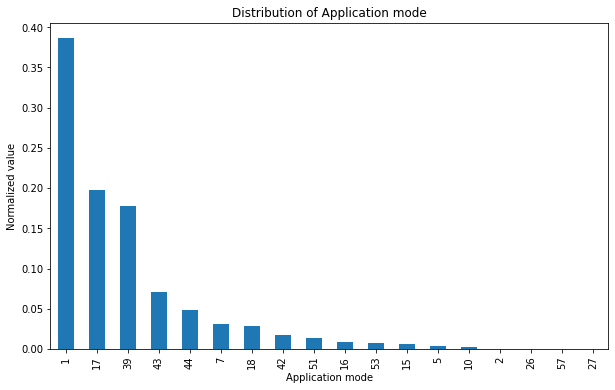

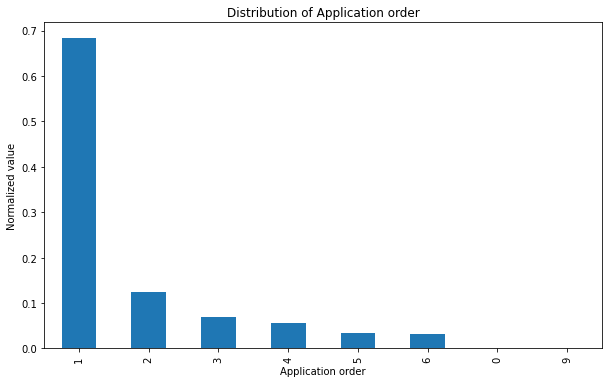

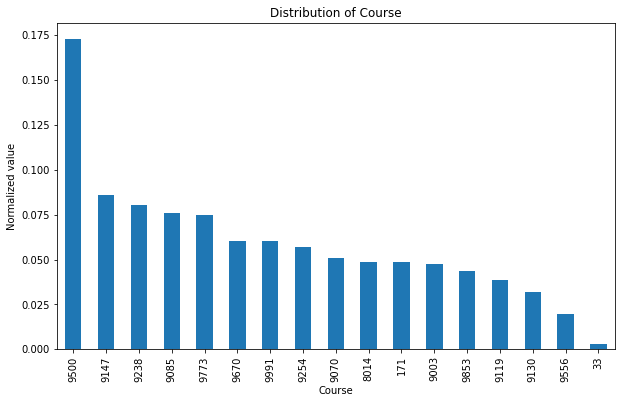

c:\users\markt\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\markt\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


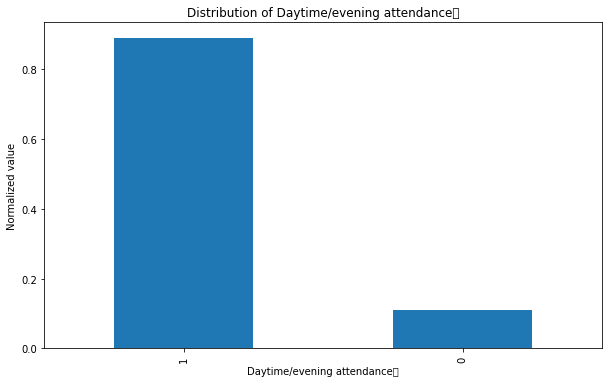

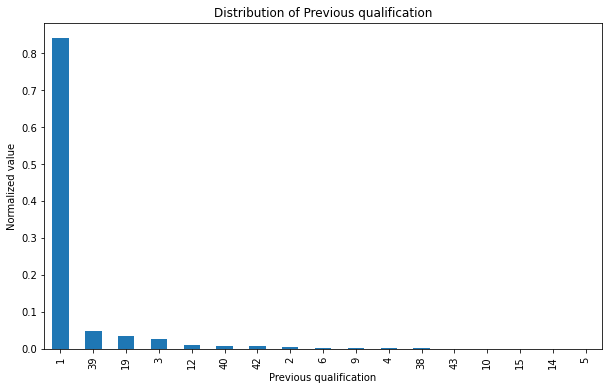

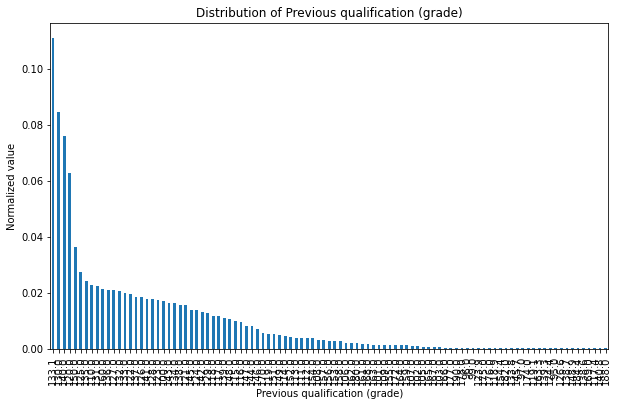

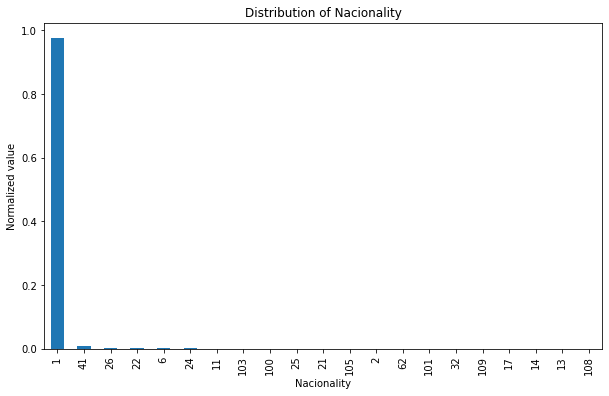

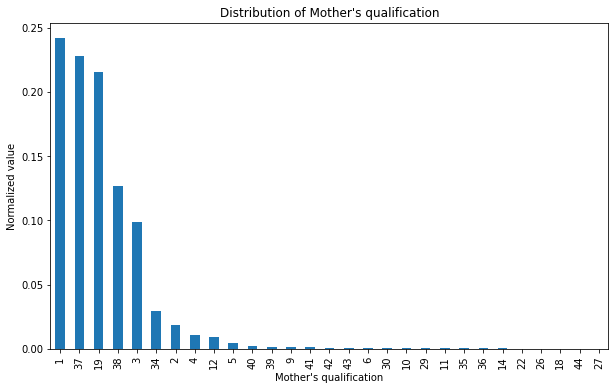

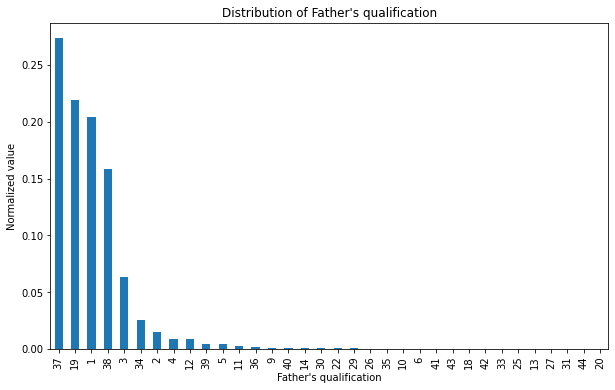

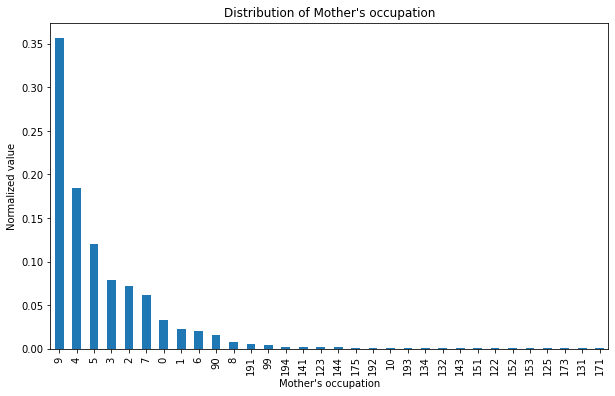

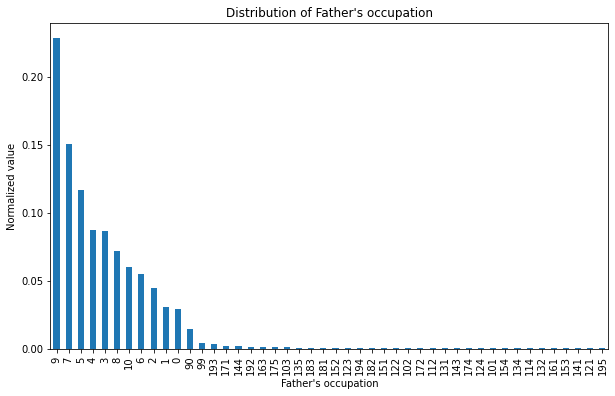

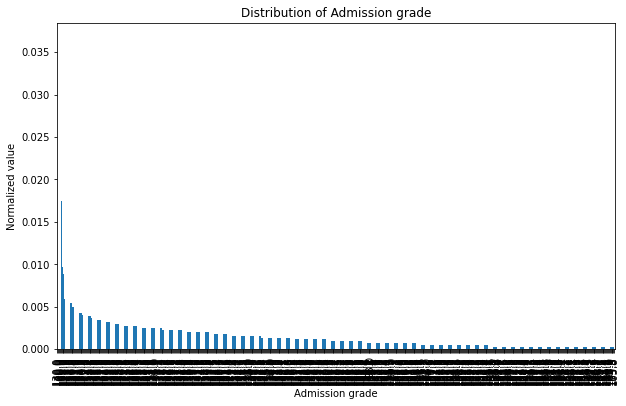

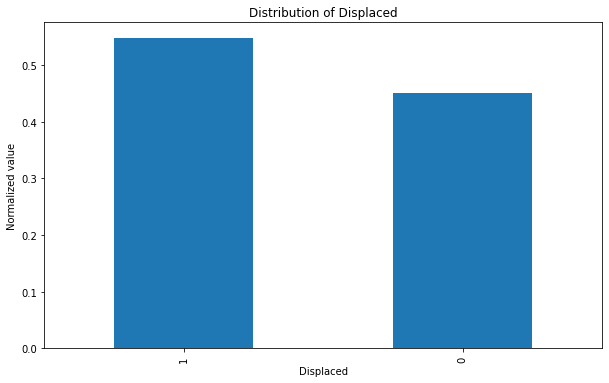

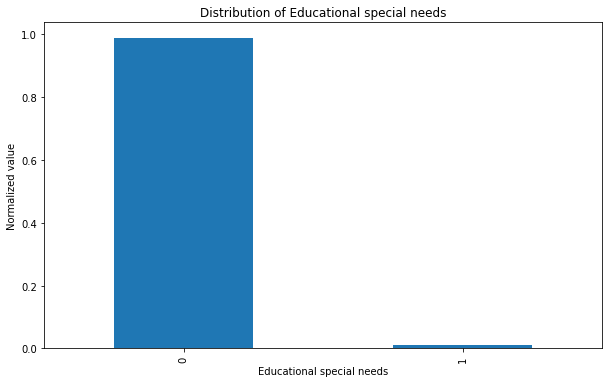

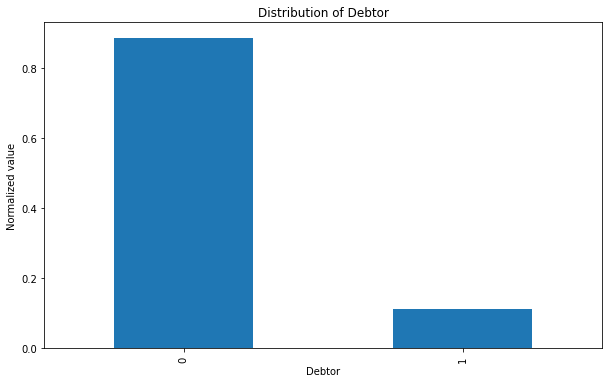

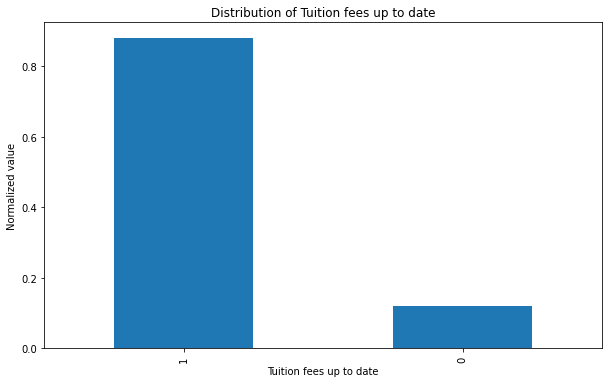

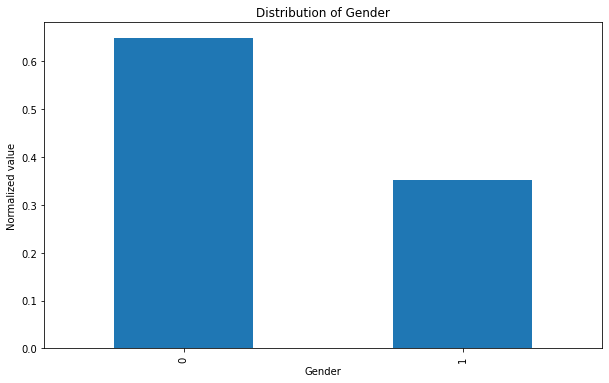

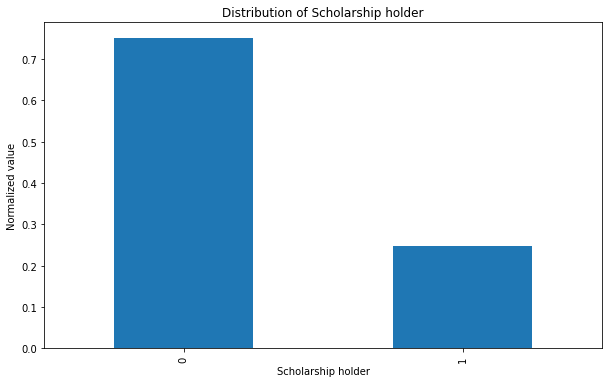

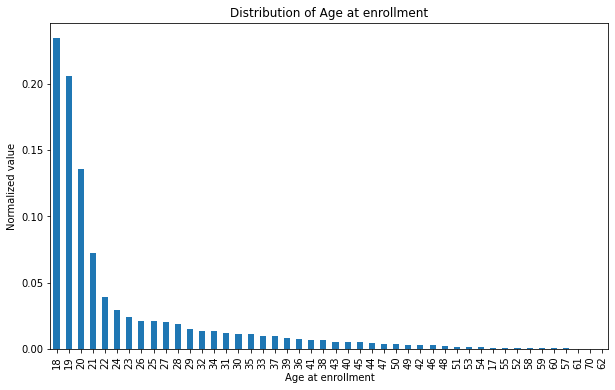

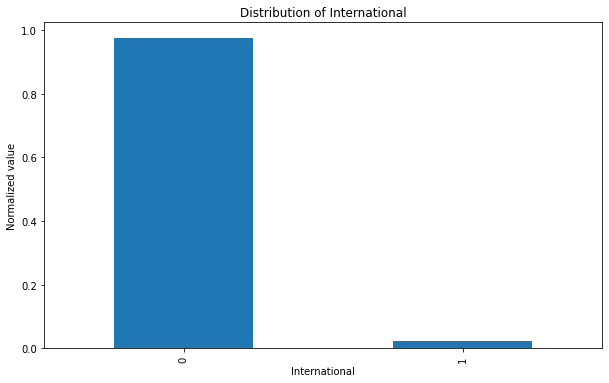

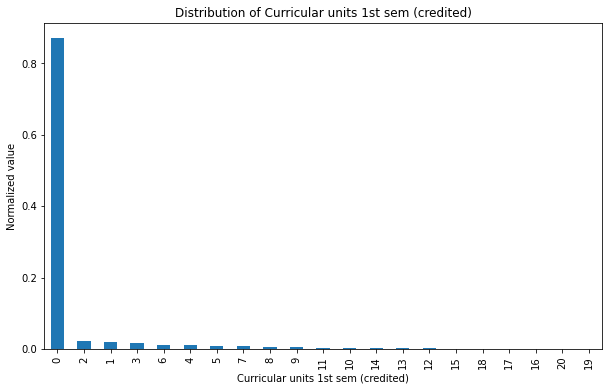

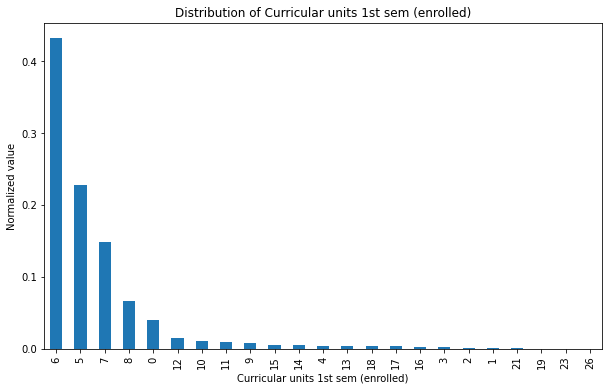

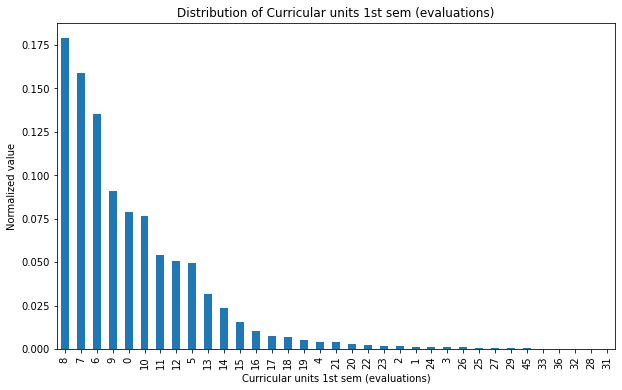

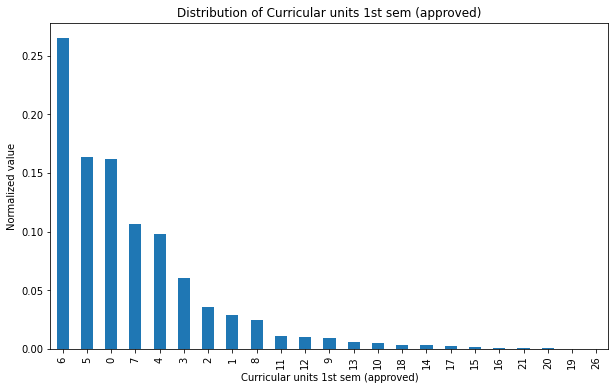

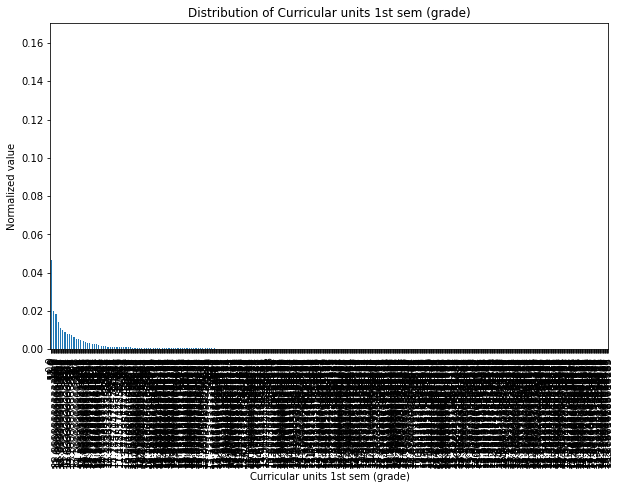

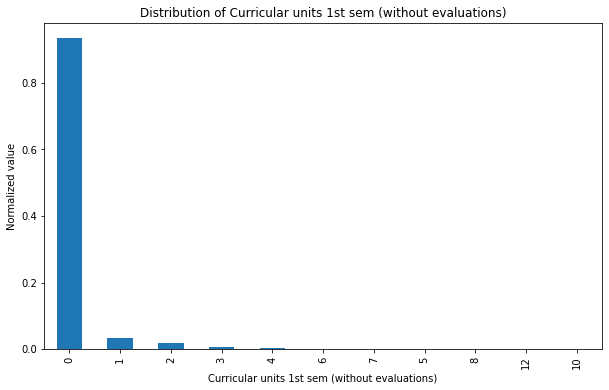

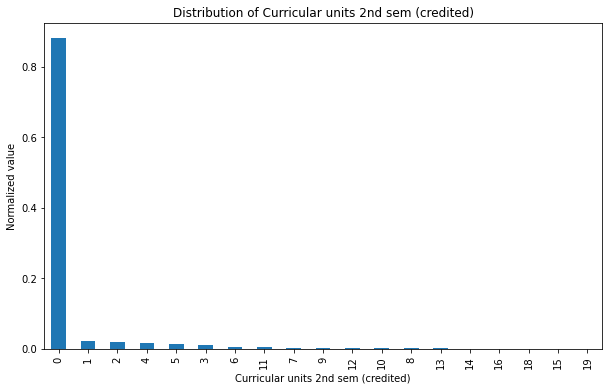

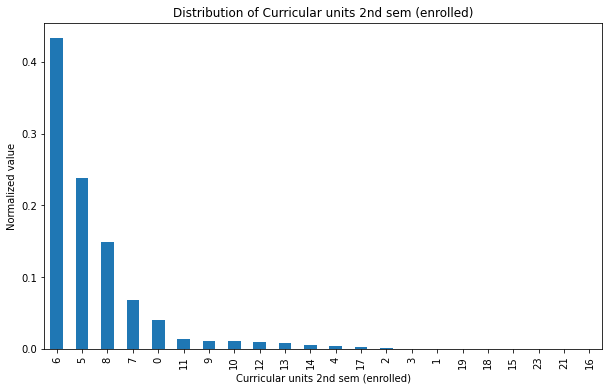

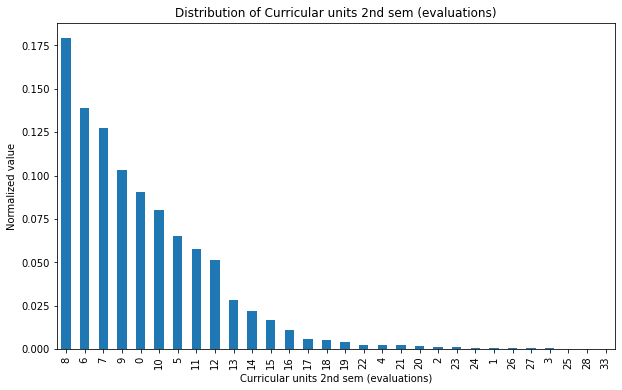

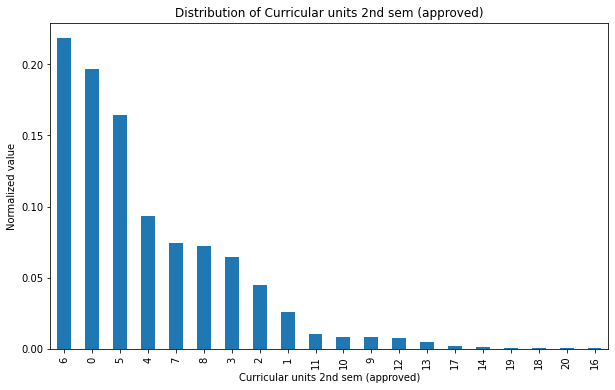

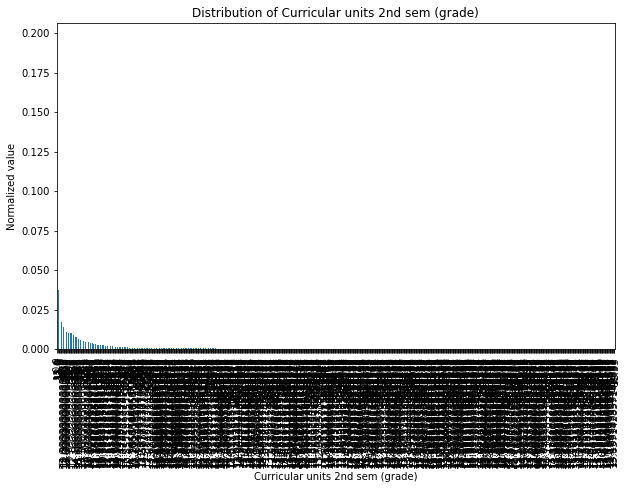

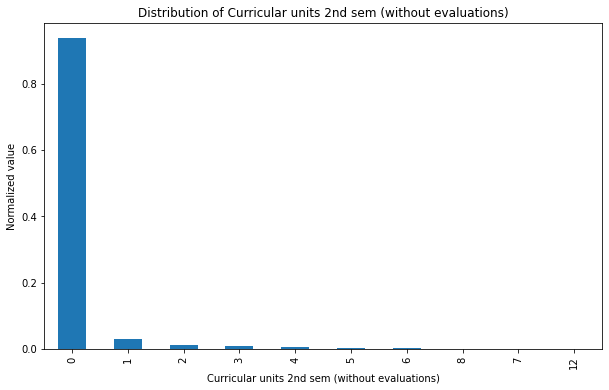

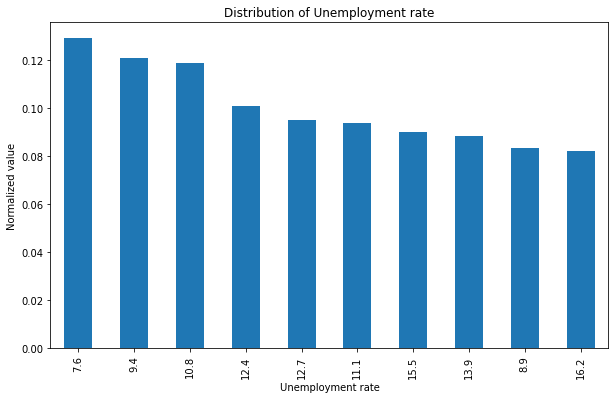

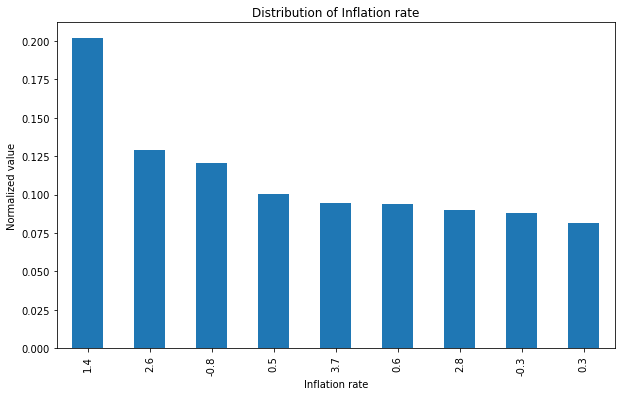

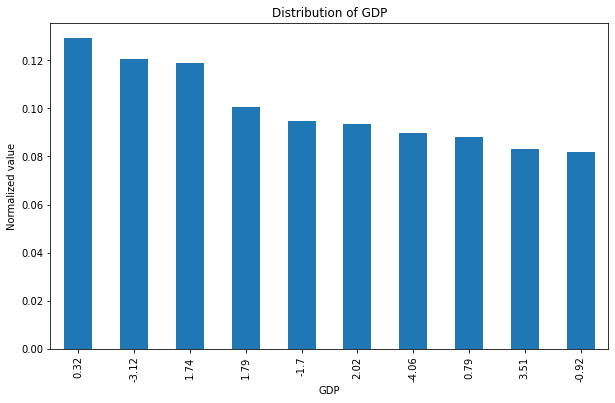

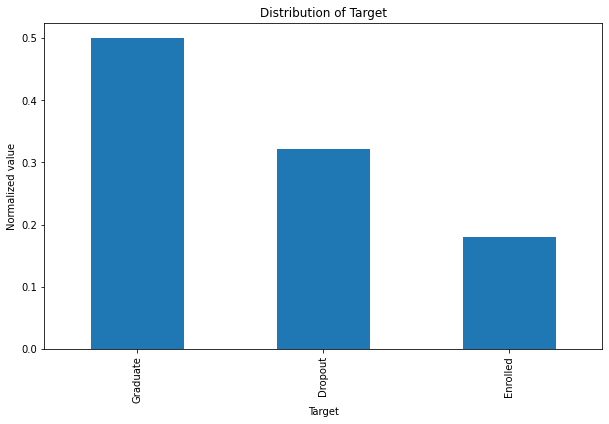

In [44]:
for col in df.columns:
    visualize_categorical_feature(df, col)

## Simplification
For simplicity and the purpose of demonstration, I hand-picked a few features for training ML model to predict the student success. Let's make that executive decision and dive much into the features. Note that making executive decision to hand-pick features is not the normal approach even though it is sometimes done in practice 

In [82]:
selected_features = [
    'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Previous qualification (grade)', 'Nacionality', 'Admission grade',
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',  'Scholarship holder',
    'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target'
]

sel_df = df[selected_features]

In [83]:
sel_df.columns.tolist()

['Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Scholarship holder',
 'Age at enrollment',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target']

<AxesSubplot:>

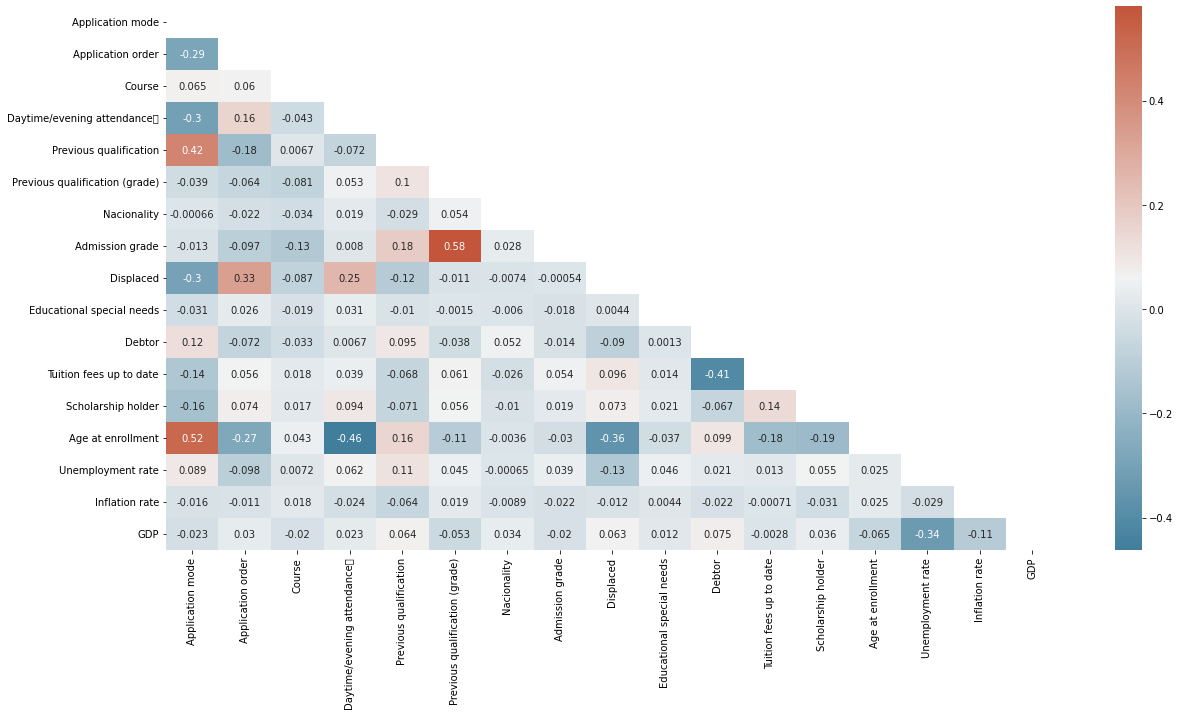

In [51]:
f, ax = plt.subplots(figsize=(20, 10))
corr = sel_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

### Handling numerical variables

### Handling categorical variables

### Handling class imbalance

### Build the ML model

1. First recognized that the target variable is discrete and the goal is to predict whether a student will enroll, dropout or graduate.
2. This makes it a supervised multi-class classification problem
3. We need models that can effectively do the job for this kin of task
4. Several of such models exist; logistic regression, support vector machines, random forest classification, extra-gradient boosting classficiation, neural networks, etc. 
5. For the sake of simplicity, I'm choosing logistic regression for this work

### Logistic regression model for our problem

Logistic regression is a statistical method used to predict the outcome of a dependent variable based on previous observations.2 It uses mathematics to find the relationships between two data factors and then predicts the value of one of those factors based on the other. The prediction usually has a finite number of outcomes, like yes or no. Logistic regression is commonly used to solve binary classification problems and is used in machine learning to create accurate predictions.1 It is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome, while multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes
https://en.wikipedia.org/wiki/Logistic_regression

https://youtu.be/EKm0spFxFG4

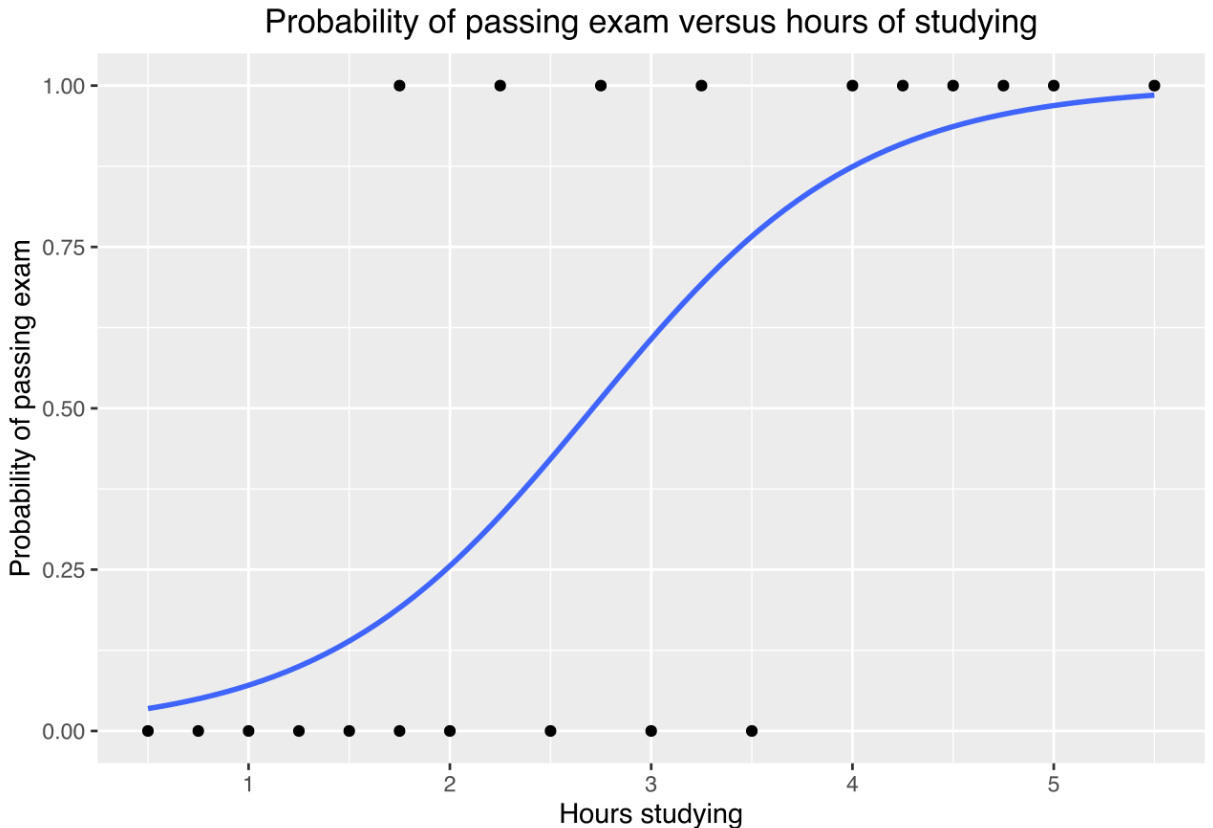


### Cost function 
This is how a machine learning model judge its performance in the training process. It gives a measure of error in the model predictions. The smaller the cost function error, the better the model accuracy.
In simple terms, the error is the difference between the actual value and the predicted value. The cost function is the average of this error and the goal of the modeling is to reduce this error to zero.

https://youtu.be/U1omz0B9FTw

In [73]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.exceptions import ConvergenceWarning
import warnings

In [90]:
# Identify the target variable column (adjust column name as per the dataset)
target_column = 'Target'

# Step 2: Data Exploration and Preprocessing (perform necessary preprocessing steps)

# Step 3: Split the Data
X = sel_df.drop(columns=[target_column])  # Input features
y = sel_df[target_column]  # Target variable

# use 20% of the data for testing, remaining for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the dataset
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Step 4: Model Selection and Training
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    model = LogisticRegression(multi_class="ovr", max_iter=1000)
    model.fit(X_train_scaled, y_train)

# Step 5: Model Evaluation (Before Tuning)
y_train_pred = model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy train (Before Tuning): {accuracy_train}")
print(f"Accuracy test (Before Tuning): {accuracy_test}")

Accuracy train (Before Tuning): 0.6205142695676745
Accuracy test (Before Tuning): 0.6146892655367232


### Now tune the model

In [91]:
# Step 6: Model Tuning and Optimization
def tune_model(model, X, y, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

# Define the parameter grid for tuning
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    "multi_class": ["ovr"] #"auto","ovr","multinomial"
}

# Tune the model using grid search
tuned_model = tune_model(model, X_train_scaled, y_train, param_grid)

# Step 5: Model Evaluation (After Tuning)
y_pred_tuned = tuned_model.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy test (After Tuning): {accuracy_tuned}")

Accuracy test (After Tuning): 0.6135593220338983


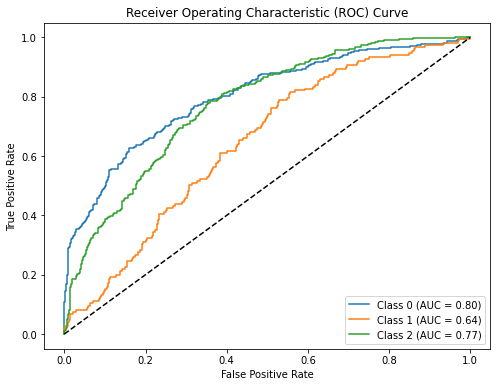

In [92]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

def plot_roc_curve(model, X, y):
    # Convert target variable to binary format
    y_bin = label_binarize(y, classes=np.unique(y))
    n_classes = y_bin.shape[1]

    # Calculate predicted probabilities
    y_pred_prob = model.predict_proba(X)

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    # Plot random guessing line
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
# Call the function to plot the ROC curve
plot_roc_curve(model, X_test_scaled, y_test)